In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")

In [3]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df_train.info()
# oneHotEncoder: Customer Type  
# labelEncoder: satisfaction, Class , Type of Travel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df_train.drop(["id","Unnamed: 0"],axis=1,inplace=True)

In [6]:
'''from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df_train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df_train[col] = lencoders[col].fit_transform(df_train[col])'''

"from sklearn.preprocessing import LabelEncoder\nlencoders = {}\nfor col in df_train.select_dtypes(include=['object']).columns:\n    lencoders[col] = LabelEncoder()\n    df_train[col] = lencoders[col].fit_transform(df_train[col])"

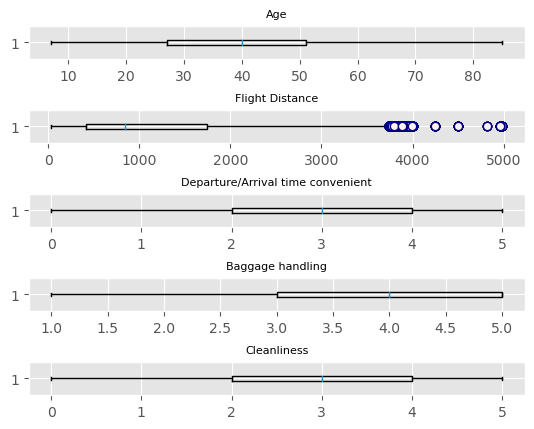

In [7]:
fig, axes = plt.subplots(5, 1)
plt.subplots_adjust(hspace=1.5)

flierprops = dict(marker='o',markerfacecolor='#FFF0F5',markersize=6, markeredgecolor='navy')

_ = axes[0].boxplot(x=df_train.Age, flierprops=flierprops, vert=False, whis=1.5)
_ = axes[0].set_title('Age', fontdict={'fontsize': 8})


flierprops = dict(marker='o',markerfacecolor='#FFF0F5',markersize=6, markeredgecolor='navy')

_ = axes[1].boxplot(x=df_train["Flight Distance"], flierprops=flierprops, vert=False, whis=1.5) # uçuş mesafesi
_ = axes[1].set_title('Flight Distance', fontdict={'fontsize': 8})

flierprops = dict(marker='o',markerfacecolor='#FFF0F5',markersize=6, markeredgecolor='navy')

_ = axes[2].boxplot(x=df_train["Departure/Arrival time convenient"], flierprops=flierprops, vert=False, whis=1.5)
_ = axes[2].set_title('Departure/Arrival time convenient', fontdict={'fontsize': 8})

flierprops = dict(marker='o',markerfacecolor='#FFF0F5',markersize=6, markeredgecolor='navy')

_ = axes[3].boxplot(x=df_train["Baggage handling"], flierprops=flierprops, vert=False, whis=1.5)
_ = axes[3].set_title('Baggage handling', fontdict={'fontsize': 8})

flierprops = dict(marker='o',markerfacecolor='#FFF0F5',markersize=6, markeredgecolor='navy')

_ = axes[4].boxplot(x=df_train["Cleanliness"], flierprops=flierprops, vert=False, whis=1.5)
_ = axes[4].set_title('Cleanliness', fontdict={'fontsize': 8})

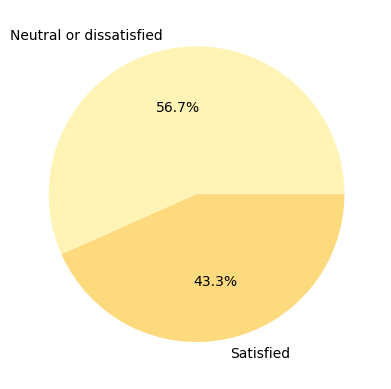

In [8]:
plt.pie(df_train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass # bunun sayessinde bazı açıklamalar geçiliyor.

In [9]:
#---------------------------

In [10]:
!pip install scikit-learn-intelex 
# bazı algoritmaları bazı şartlar altında daha hızlı çalıştırmayı sağlar. Örneğin SVM

In [11]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [12]:
categorical_indexes = [0,1,3,4] + list(range(6,20))
df_train.iloc[:,categorical_indexes] = df_train.iloc[:,categorical_indexes].astype('category')
# katogorik olan değerlerin tipini "catogory" yaptım

/tmp/ipykernel_32/1901407447.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train.iloc[:,categorical_indexes] = df_train.iloc[:,categorical_indexes].astype('category')


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

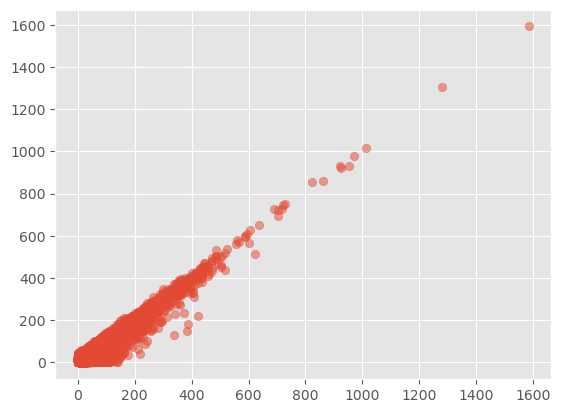

In [14]:
''' grafiğe bakılıcak olursa: Noktaların sol alt köşeden sağ üst köşeye giden düz bir çizgi boyunca aşağı yukarı 
 sıralandığını görebilirsiniz. Dolayısıyla, yaklaşık olarak varış zamanı gecikmesinin kalkış zamanı gecikmesine
 bağımlılığı doğrusaldır.'''
plt.scatter (df_train['Arrival Delay in Minutes'], df_train['Departure Delay in Minutes'], alpha = 0.5)
pass

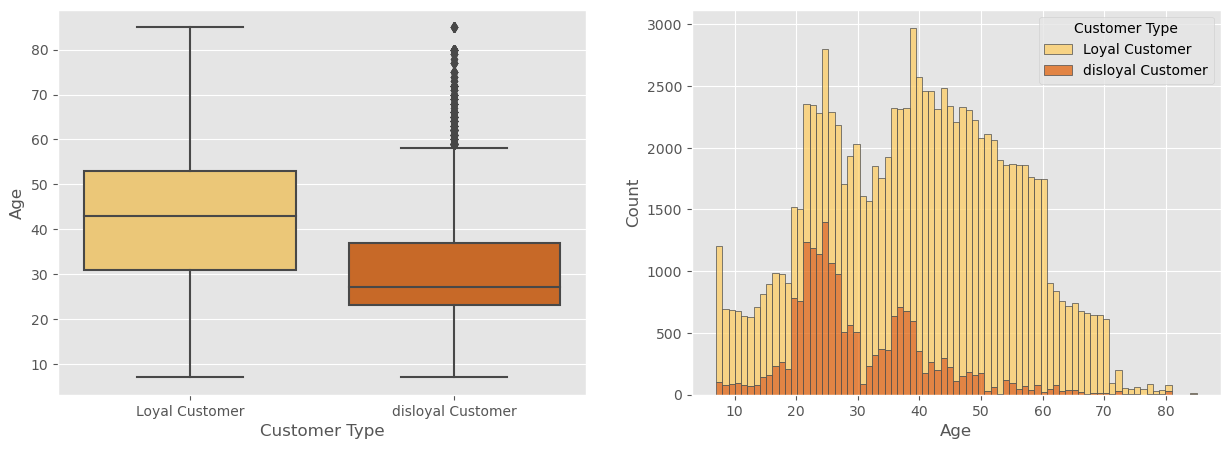

In [15]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

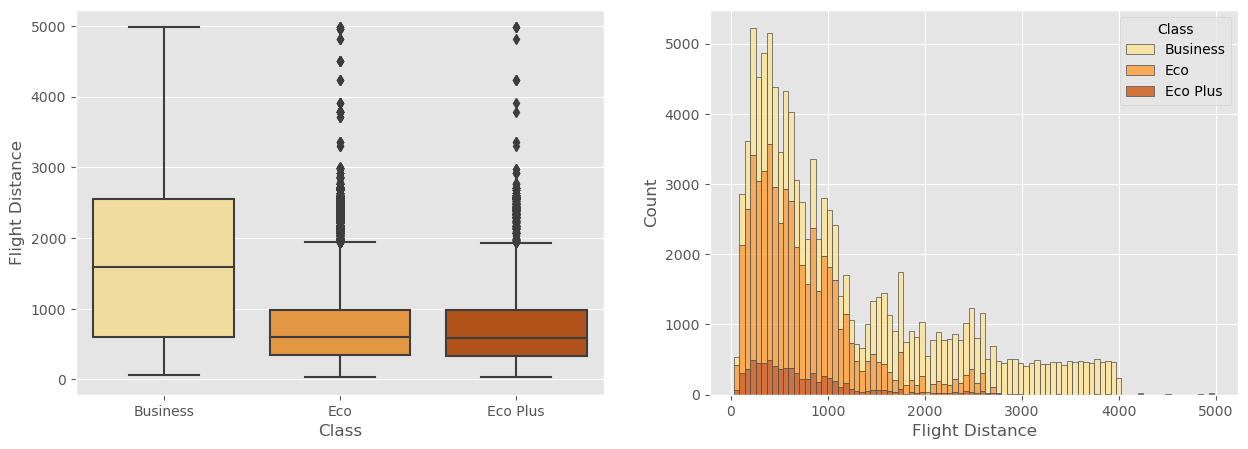

In [16]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = df_train, ax = ax[0])
sns.histplot(df_train, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

In [17]:
# Nan değerlerin doldurulması
df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [18]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,103904.0,39.379706,15.114964,7.0,27.0,40.0,51.0,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.0,843.0,1743.0,4983.0
Departure Delay in Minutes,103904.0,14.815618,38.230901,0.0,0.0,0.0,12.0,1592.0
Arrival Delay in Minutes,103904.0,15.133392,38.649776,0.0,0.0,0.0,13.0,1584.0


In [19]:
# Handling categorical features

In [20]:
numerical_columns = [c for c in df_train.columns if df_train[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in df_train.columns if df_train[c].dtype.name == 'category']
data_describe = df_train.describe(include = ['category'])

In [21]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


In [22]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in df_train[col].unique():
        if uniq == df_train[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


In [23]:
for col in binary_columns: # label encoder
    df_train[col] = df_train[col].astype('object')
    k = 0
    for uniq in df_train[col].unique():
        df_train.loc[df_train[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(df_train[col].describe(), end = '\n\n')

count     103904
unique         2
top            1
freq       52727
Name: Gender, dtype: int64

count     103904
unique         2
top            0
freq       84923
Name: Customer Type, dtype: int64

count     103904
unique         2
top            1
freq       71655
Name: Type of Travel, dtype: int64



In [24]:
data_nonbinary = pd.get_dummies(df_train[nonbinary_columns]) # one hot encoder

In [25]:
# Normalization of quantitative features

In [26]:
data_numerical = df_train[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [27]:
# standardizasyon
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [28]:
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


In [29]:
# Table formation

In [30]:
target = df_train['satisfaction']
df_train = pd.concat((data_numerical, data_nonbinary, df_train[binary_columns]), axis = 1)
print(df_train.shape)

(103904, 93)


In [31]:
# Splitting the data on training and test sets

In [32]:
X = df_train
y = target
N, d = X.shape
N, d

(103904, 93)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 33)

In [34]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [37]:
# -----------------   K-nearest neighbors (kNN) method ---------------------

knn = KNeighborsClassifier()

knn.set_params(n_neighbors = 10)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.053008672590976656
Error on the test sample:  0.06293908189779616


In [38]:
# -----------------------    SVC   --------------------------

svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.04980056248863794
Error on the test sample:  0.05235299778654605


In [39]:
# ------------------------    Random Forest  ------------------------

rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  5.3468501705645206e-05
Error on the test sample:  0.0373400057742277


In [40]:
# -------------------------   Extremely Randomized Trees  -----------------

ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.0
Error on the test sample:  0.03936098546819363


In [41]:
# -------------------    AdaBoost  ----------------------

ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.07063189075315732
Error on the test sample:  0.06938696949283034
